In [1]:
#basics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.utils import resample

#preferences 
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

### Loading, Shaping and Clearning Data

In [2]:
rawData = pd.read_csv('bcsdata.csv')

/var/folders/m6/z_7vpd8x7j79s4b0lm1vxb280000gn/T/ipykernel_18781/3539343052.py:1: DtypeWarning: Columns (2,9,21,27,33,37,43,53,56,59,62,65,108) have mixed types. Specify dtype option on import or set low_memory=False.
  rawData = pd.read_csv('bcsdata.csv')


In [3]:
rawData.shape

(1360990, 141)

In [4]:
#Data is the complete wrong shape and is outrageously long. There is a row for every DIM and BCS/DIM up to 150. 
rawData.head(3)

,ID,LACT,PrevDryDAT,Calving_date,ai1_DIM,ai1_Date,outcome1AI,ai2,ai3,ai4,ai5,ai6,ai7,ai8,ai9,ai10,tmsbred,Pregnant,pregnancy_DIM,pregnancy_Date,Abort_DIM,abort_Date,ABORT,EPL,gestation_days,DIED,Died_DIM,died_Date,INDGST,Indigest_DIM,Indigest_Date,INJURY,Injury_DIM,Injury_Date,KETOSIS,ket_DIM,ket_Date,Lame_diagnosis,lame_DIM,lame_Date,lame,LDA,lda_DIM,lda_Date,MAST,mast_DIM,mast_Date,mast_Remark,MET,met_DIM,met_Date,MFEVER,mfever_DIM,mfever_Date,PYO,PYO_DIM,PYO_Date,PNEU,pneu_DIM,pneu_Date,rtp,RETAINP_DIM,RETAINP_Date,SOLD,sold_DIM,sold_Date,calvBCS,BCS7dim_Date,BCS7dim,BCS14dim_Date,BCS14dim,BCS21dim_Date,BCS21dim,BCS28dim_Date,BCS28dim,BCS35dim_Date,BCS35dim,BCS42dim_Date,BCS42dim,BCS49dim_Date,BCS49dim,BCS56dim_Date,BCS56dim,BCS63dim_Date,BCS63dim,BCS70dim_Date,BCS70dim,BCS77dim_Date,BCS77dim,BCS84dim_Date,BCS84dim,BCS91dim_Date,BCS91dim,BCS100dim_date,BCS100dim,BCSabort,BCSindigest,BCSket,BCSlame,BCSlda,BCSmast,BCSmet,BCSmfever,BCSpyo,BCSpneu,milkavg30,milkavg60,milkavg100,BCS_Date_dryoff,BCS_dryoff,dim_dryoff,nadirDIM,nadirBCS,date_7dafternadir,BCS_7dafternadir,dim_7afternadir,date_14dafternadir,BCS_14dafternadir,dim_14afternadir,date_21dafternadir,BCS_21dafternadir,dim_21afternadir,calving_season,parity,disease_events,health_system,Health_status,totalmilkproduced305,milkmonth1,milkmonth2,milkmonth3,milkmonth4,milkmonth5,milkmonth6,milkmonth7,milkmonth8,milkmonth9,milkmonth10,BCS_Date,BCS_Value,dim
0,1,2,18NOV2020,22JAN2021,69,04JAN2021,O,05APR2021,06JUN2021,26JUN2021,8-May-21,27-Aug-21,21-Sep-21,12-Feb-21,22-Jan-22,.,9,1,242.0,21SEP2021,292.0,10NOV2021,1.0,1.0,50.0,0,NaN,NaN,1,5,27-Jan-21,0,NaN,NaN,1,6,28-Jan-21,Warts,92,24-Apr-21,1,0,NaN,NaN,1,185,7-Jun-19,NOT A,0,.,.,0,NaN,NaN,1,31.0,22FEB2021,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,2.9,29JAN2021,3.0,05FEB2021,3.1,12FEB2021,3.0,19FEB2021,3.0,26FEB2021,2.9,05MAR2021,2.8,12MAR2021,2.7,19MAR2021,2.8,26MAR2021,2.8,02APR2021,2.7,09APR2021,2.7,16APR2021,2.8,23APR2021,2.8,NaN,NaN,3.1,3,3,2.8,NaN,2.8,.,NaN,3,NaN,71.11,76.06,89.26,18NOV2020,3.3,-65.0,47,2.7,17MAR2021,2.8,54.0,24MAR2021,2.8,61.0,31MAR2021,2.7,68.0,Winter,MP,3,MUL,mult_events,23263.04,71.11,95.17,102.624,97.743,96.048,93.036,93.052,86.345,80.022,81.182,24JAN2021,2.9,2
1,1,2,18NOV2020,22JAN2021,69,04JAN2021,O,05APR2021,06JUN2021,26JUN2021,8-May-21,27-Aug-21,21-Sep-21,12-Feb-21,22-Jan-22,.,9,1,242.0,21SEP2021,292.0,10NOV2021,1.0,1.0,50.0,0,NaN,NaN,1,5,27-Jan-21,0,NaN,NaN,1,6,28-Jan-21,Warts,92,24-Apr-21,1,0,NaN,NaN,1,185,7-Jun-19,NOT A,0,.,.,0,NaN,NaN,1,31.0,22FEB2021,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,2.9,29JAN2021,3.0,05FEB2021,3.1,12FEB2021,3.0,19FEB2021,3.0,26FEB2021,2.9,05MAR2021,2.8,12MAR2021,2.7,19MAR2021,2.8,26MAR2021,2.8,02APR2021,2.7,09APR2021,2.7,16APR2021,2.8,23APR2021,2.8,NaN,NaN,3.1,3,3,2.8,NaN,2.8,.,NaN,3,NaN,71.11,76.06,89.26,18NOV2020,3.3,-65.0,47,2.7,17MAR2021,2.8,54.0,24MAR2021,2.8,61.0,31MAR2021,2.7,68.0,Winter,MP,3,MUL,mult_events,23263.04,71.11,95.17,102.624,97.743,96.048,93.036,93.052,86.345,80.022,81.182,25JAN2021,3.0,3
2,1,2,18NOV2020,22JAN2021,69,04JAN2021,O,05APR2021,06JUN2021,26JUN2021,8-May-21,27-Aug-21,21-Sep-21,12-Feb-21,22-Jan-22,.,9,1,242.0,21SEP2021,292.0,10NOV2021,1.0,1.0,50.0,0,NaN,NaN,1,5,27-Jan-21,0,NaN,NaN,1,6,28-Jan-21,Warts,92,24-Apr-21,1,0,NaN,NaN,1,185,7-Jun-19,NOT A,0,.,.,0,NaN,NaN,1,31.0,22FEB2021,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,2.9,29JAN2021,3.0,05FEB2021,3.1,12FEB2021,3.0,19FEB2021,3.0,26FEB2021,2.9,05MAR2021,2.8,12MAR2021,2.7,19MAR2021,2.8,26MAR2021,2.8,02APR2021,2.7,09APR2021,2.7,16APR2021,2.8,23APR2021,2.8,NaN,NaN,3.1,3,3,2.8,NaN,2.8,.,NaN,3,NaN,71.11,76.06,89.26,18NOV2020,3.3,-65.0,47,2.7,17MAR2021,2.8,54.0,24MAR2021,2.8,61.0,31MAR2021,2.7,68.0,Winter,MP,3,MUL,mult_events,23263.04,71.11,95.17,102.624,97.743,96.048,93.036,93.052,86.345,80.022,81.182,26JAN2021,3.0,4


In [5]:
#Make the BCS/DIM into columns instead.
pivot = rawData.pivot_table(index='ID', columns='dim', values='BCS_Value')
data = rawData.drop_duplicates(subset='ID').merge(pivot, on='ID', how='inner')

#Drop any rows with no pregnancy
data = data[data["Pregnant"] != 0]
data.shape

(6524, 292)

In [6]:
data.head()

,ID,LACT,PrevDryDAT,Calving_date,ai1_DIM,ai1_Date,outcome1AI,ai2,ai3,ai4,ai5,ai6,ai7,ai8,ai9,ai10,tmsbred,Pregnant,pregnancy_DIM,pregnancy_Date,Abort_DIM,abort_Date,ABORT,EPL,gestation_days,DIED,Died_DIM,died_Date,INDGST,Indigest_DIM,Indigest_Date,INJURY,Injury_DIM,Injury_Date,KETOSIS,ket_DIM,ket_Date,Lame_diagnosis,lame_DIM,lame_Date,lame,LDA,lda_DIM,lda_Date,MAST,mast_DIM,mast_Date,mast_Remark,MET,met_DIM,met_Date,MFEVER,mfever_DIM,mfever_Date,PYO,PYO_DIM,PYO_Date,PNEU,pneu_DIM,pneu_Date,rtp,RETAINP_DIM,RETAINP_Date,SOLD,sold_DIM,sold_Date,calvBCS,BCS7dim_Date,BCS7dim,BCS14dim_Date,BCS14dim,BCS21dim_Date,BCS21dim,BCS28dim_Date,BCS28dim,BCS35dim_Date,BCS35dim,BCS42dim_Date,BCS42dim,BCS49dim_Date,BCS49dim,BCS56dim_Date,BCS56dim,BCS63dim_Date,BCS63dim,BCS70dim_Date,BCS70dim,BCS77dim_Date,BCS77dim,BCS84dim_Date,BCS84dim,BCS91dim_Date,BCS91dim,BCS100dim_date,BCS100dim,BCSabort,BCSindigest,BCSket,BCSlame,BCSlda,BCSmast,BCSmet,BCSmfever,BCSpyo,BCSpneu,milkavg30,milkavg60,milkavg100,BCS_Date_dryoff,BCS_dryoff,dim_dryoff,nadirDIM,nadirBCS,date_7dafternadir,BCS_7dafternadir,dim_7afternadir,date_14dafternadir,BCS_14dafternadir,dim_14afternadir,date_21dafternadir,BCS_21dafternadir,dim_21afternadir,calving_season,parity,disease_events,health_system,Health_status,totalmilkproduced305,milkmonth1,milkmonth2,milkmonth3,milkmonth4,milkmonth5,milkmonth6,milkmonth7,milkmonth8,milkmonth9,milkmonth10,BCS_Date,BCS_Value,dim,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150
0,1,2,18NOV2020,22JAN2021,69,04JAN2021,O,05APR2021,06JUN2021,26JUN2021,8-May-21,27-Aug-21,21-Sep-21,12-Feb-21,22-Jan-22,.,9,1,242.0,21SEP2021,292.0,10NOV2021,1.0,1.0,50.0,0,NaN,NaN,1,5,27-Jan-21,0,NaN,NaN,1,6,28-Jan-21,Warts,92,24-Apr-21,1,0,NaN,NaN,1,185,7-Jun-19,NOT A,0,.,.,0,NaN,NaN,1,31.0,22FEB2021,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,2.9,29JAN2021,3.0,05FEB2021,3.1,12FEB2021,3.0,19FEB2021,3.0,26FEB2021,2.9,05MAR2021,2.8,12MAR2021,2.7,19MAR2021,2.8,26MAR2021,2.8,02APR2021,2.7,09APR2021,2.7,16APR2021,2.8,23APR2021,2.8,NaN,NaN,3.1,3,3,2.8,NaN,2.8,.,NaN,3,NaN,71.11,76.06,89.26,18NOV2020,3.3,-65.0,47,2.7,17MAR2021,2.8,54.0,24MAR2021,2.8,61.0,31MAR2021,2.7,68.0,Winter,MP,3,MUL,mult_events,23263.04,71.110,95.170,102.624,97.743,96.048,93.036,93.052,86.345,80.022,81.182,24JAN2021,2.9,2,NaN,NaN,2.90,3.0,3.0,3.0,3.0,3.0,3.0,3.00,3.1,3.1,3.10,3.1,3.10,3.10,3.10,3.10,3.10,3.00,3.0,3.00,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.9,2.9,2.9,2.9,2.9,2.9,2.9,2.9,2.9,2.8,2.8,2.8,2.8,2.8,2.8,2.7,2.8,2.7,2.7,2.8,2.8,2.8,2.8,2.8,2.8,2.8,2.8,2.8,2.8,2.8,2.80,2.80,2.70,2.70,2.70,2.70,2.70,2.70,2.70,2.70,2.7,2.7,2.7,2.7,2.7,2.7,2.8,2.8,2.8,2.8,2.8,2.8,2.8,2.8,2.8,2.8,2.8,2.8,2.8,2.8,2.8,2.8,2.8,2.8,2.8,2.8,2.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.70,2.70,2.80,2.70,2.7,2.8,2.7,2.7,2.80,2.700000,2.700000,2.800000,2.800000,2.800000,2.800000,2.800000,2.700000,2.70000,2.800000,2.800000,2.800000
1,2,3,01FEB2020,28FEB2020,62,30APR2020,O,06MAR2020,25JUN2020,19FEB2021,.,.,.,.,.,.,4,1,118.0,25JUN2020,309.0,02JAN2021,1.0,0.0,191.0,0,NaN,NaN,0,.,.,0,NaN,NaN,0,.,.,Warts,338,31-Jan-21,1,0,NaN,NaN,0,.,.,NaN,0,.,.,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,1,363.0,25FEB2021,3.4,06MAR2020,3.4,13MAR2020,3.2,20MAR2020,3.2,27MAR2020,3.2,03APR2020,3.2,10APR2020,3.1,17APR2020,3.1,24APR2020,3.1,01MAY2020,3.1,08MAY2020,3.1,15MAY2020,3.0,22MAY2020,3.0,29MAY2020,3.1,07JUN2020,3.1,3.5,.,.,3.4,NaN,.,.,NaN,.,NaN,94.01,104.07,106.80,02JAN2020,3.6,-57.0,37,3.0,12APR2020,3.1,44.0,19APR2020,3.1,51.0,26APR2020,3.1,58.0,

In [7]:
#discard data where the cow died or was sold
data = data[data["DIED"] != 1]
data = data[data["SOLD"] != 1]
data.shape

(5604, 292)

In [8]:
#Encode categorical variable
label_encoder = LabelEncoder()
data['outcome1AI'] = label_encoder.fit_transform(data['outcome1AI'])

In [9]:
print("Class imbalance: " , sum(data['ABORT'] == 1) / (sum(data['ABORT'] == 0) + sum(data['ABORT'] == 1)))

Class imbalance:  0.0704853675945753


In [10]:
#drop off last 50 dim of bcs (only predicting using 100 days)
data = data.iloc[:,:242]
data.shape

(5604, 242)

In [11]:
# forcefully make everything numeric
data = data.apply(pd.to_numeric, errors='coerce') 
data = data.replace('.', np.nan)

In [12]:
#strategically drop unusable or 'cheating' columns
drop = ['ID', 'Abort_DIM','PrevDryDAT', 'Calving_date','ai1_Date', 'ai2', 'ai3', 'ai4', 'ai5', 
'ai6', 'ai7', 'ai8', 'ai9', 'ai10', 'pregnancy_Date','abort_Date',
'gestation_days','DIED', 'Died_DIM', 'died_Date', 
'Indigest_Date', 'Injury_Date', 'ket_Date', 'lame_Date', 'DIED', 'Died_DIM', 'died_Date', 
'lda_Date', "mast_Date","met_Date", "mfever_Date", "PYO_Date", "pneu_Date","RETAINP_Date",
"sold_Date", 'BCS7dim_Date', 'BCS7dim', 'BCS14dim_Date', 'BCS14dim',
'BCS21dim_Date', 'BCS21dim', 'BCS28dim_Date', 'BCS28dim',
'BCS35dim_Date', 'BCS35dim', 'BCS42dim_Date', 'BCS42dim',
'BCS49dim_Date' , 'BCS49dim', 'BCS56dim_Date', 'BCS56dim', 'BCS63dim_Date', 'BCS63dim',
'BCS70dim_Date', 'BCS70dim', 'BCS77dim_Date', 'BCS77dim',
'BCS84dim_Date', 'BCS84dim', 'BCS91dim_Date', 'BCS91dim',
'BCS100dim_date', 'BCS100dim', 'BCSabort', 'BCS_Date_dryoff', 'date_7dafternadir',
'date_14dafternadir' , 'date_21dafternadir' , 'totalmilkproduced305' , 'milkmonth4',
'milkmonth5',  'milkmonth6','milkmonth7',  'milkmonth8',  'milkmonth9', 
'milkmonth10' , 'BCS_Date', 'BCS_Value' , 'dim','SOLD','sold_DIM','dim_7afternadir' ,
  'dim_14afternadir','dim_21afternadir' ,'EPL' ]

In [13]:
data = data.drop(drop, axis=1)

In [14]:
# We only want infromation that occurs before the model is made. The following code does this. Set the entry to zero
# if the DIM it happens at is after the model is made, and say the DIM is NaN. This is like the event never happened.

i = np.maximum(data['pregnancy_DIM'], 100) #The DIM the model is made (see paper). Either 100 or pregnancyDIM.

data.loc[data['Injury_DIM'] >= i, 'INJURY'] = 0
data.loc[data['Injury_DIM'] >= i, 'Injury_DIM'] = np.nan

data.loc[data['ket_DIM']  >= i, 'KETOSIS'] = 0
data.loc[data['ket_DIM'] >= i, 'ket_DIM'] = np.nan

data.loc[data['lame_DIM']  >= i, 'lame'] = 0
data.loc[data['lame_DIM'] >= i, 'lame_DIM'] = np.nan

data.loc[data['lda_DIM']  >= i, 'LDA'] = 0
data.loc[data['lda_DIM'] >= i, 'lda_DIM'] = np.nan

data.loc[data['mast_DIM']  >= i, 'MAST'] = 0
data.loc[data['mast_DIM'] >= i, 'mast_DIM'] = np.nan

data.loc[data['mfever_DIM']  >= i, 'MFEVER'] = 0
data.loc[data['mfever_DIM'] >= i, 'mfever_DIM'] = np.nan

data.loc[data['PYO_DIM']  >= i, 'PYO'] = 0
data.loc[data['PYO_DIM'] >= i, 'PYO_DIM'] = np.nan

data.loc[data['pneu_DIM']  >= i, 'PNEU'] = 0
data.loc[data['pneu_DIM'] >= i, 'pneu_DIM'] = np.nan

data.loc[data['Indigest_DIM']  >= i, 'INDGST'] = 0
data.loc[data['Indigest_DIM'] >= i, 'Indigest_DIM'] = np.nan

data.loc[data['RETAINP_DIM']  >= i, 'rtp'] = 0
data.loc[data['RETAINP_DIM'] >= i, 'RETAINP_DIM'] = np.nan

data.loc[data['met_DIM']  >= i, 'MET'] = 0
data.loc[data['met_DIM'] >= i, 'met_DIM'] = np.nan

In [15]:
#Second drop after using DIM columns to drop the above information.
drop2 = [ 'Indigest_DIM', 'Injury_DIM', 
         'ket_DIM', 'lame_DIM' , 'lda_DIM', 'mast_DIM', 'mast_Remark','BCSindigest',
         "BCSket","BCSlame","BCSlda","BCSmast","BCSmet","BCSmfever","BCSpyo","BCSpneu",             
         'met_DIM', 'mfever_DIM', 'PYO_DIM' , 'pneu_DIM',
         'RETAINP_DIM', 'dim_dryoff', 'BCS_dryoff' ,"Lame_diagnosis","calving_season", "parity",
        "health_system", "Health_status" , "Pregnant" ,'BCS_7dafternadir', 'BCS_14dafternadir',
       'BCS_21dafternadir']

In [16]:
data = data.drop(drop2, axis=1)

In [17]:
#Downsampling Cell
###################

#get df's of the two different classes
majority = data[data['ABORT'] == 0]
minority = data[data['ABORT'] == 1]

#use resample to downsample majority
downsampled_majority = resample(majority,replace=False, n_samples=len(minority),random_state=42)

#combine minority and downsampled majority together
downsampledFull = pd.concat([downsampled_majority, minority])

#keep unused data to test later (only abort == 0)
unused_data = data[(data['ABORT'] == 0) & (~data.index.isin(downsampledFull.index))]

#shuffle the data (wierd way to do this but...)
data = downsampledFull.sample(frac=1, random_state=42).reset_index()

In [18]:
print("DataFrame new shape: " , data.shape)

DataFrame new shape:  (790, 129)


In [19]:
#need to fill na's to visualize, but that is cheating for actual modeling, so set aside current data.
dataSave = data.copy()
data = data.fillna(data.mean())

### Data Exploration and Wrangling

In [21]:
#some good summary for each column, with null value amount and pearson correlation
corr = data.corr()
corr_just_abort = corr['ABORT'].drop('ABORT', axis = 0) 
ranked = corr_just_abort.abs().sort_values(ascending=False)
#print(corr_just_abort)
for feature in ranked.index:
    null_count = dataSave[feature].isnull().sum()
    print(f"{feature}: Correlation: {round(corr_just_abort[feature],3)}, Null count: {null_count}")

tmsbred: Correlation: 0.552, Null count: 0
outcome1AI: Correlation: -0.382, Null count: 0
pregnancy_DIM: Correlation: 0.364, Null count: 0
ai1_DIM: Correlation: -0.217, Null count: 0
PYO: Correlation: 0.177, Null count: 0
disease_events: Correlation: 0.159, Null count: 0
milkmonth3: Correlation: 0.153, Null count: 2
nadirBCS: Correlation: -0.151, Null count: 0
milkmonth2: Correlation: 0.137, Null count: 1
milkavg100: Correlation: 0.136, Null count: 0
rtp: Correlation: 0.123, Null count: 0
LACT: Correlation: 0.122, Null count: 0
INDGST: Correlation: 0.12, Null count: 0
milkavg60: Correlation: 0.118, Null count: 0
86: Correlation: -0.112, Null count: 82
81: Correlation: -0.103, Null count: 78
88: Correlation: -0.102, Null count: 82
80: Correlation: -0.1, Null count: 77
84: Correlation: -0.099, Null count: 78
78: Correlation: -0.099, Null count: 75
42: Correlation: -0.098, Null count: 84
90: Correlation: -0.097, Null count: 80
calvBCS: Correlation: -0.096, Null count: 0
96: Correlation: -

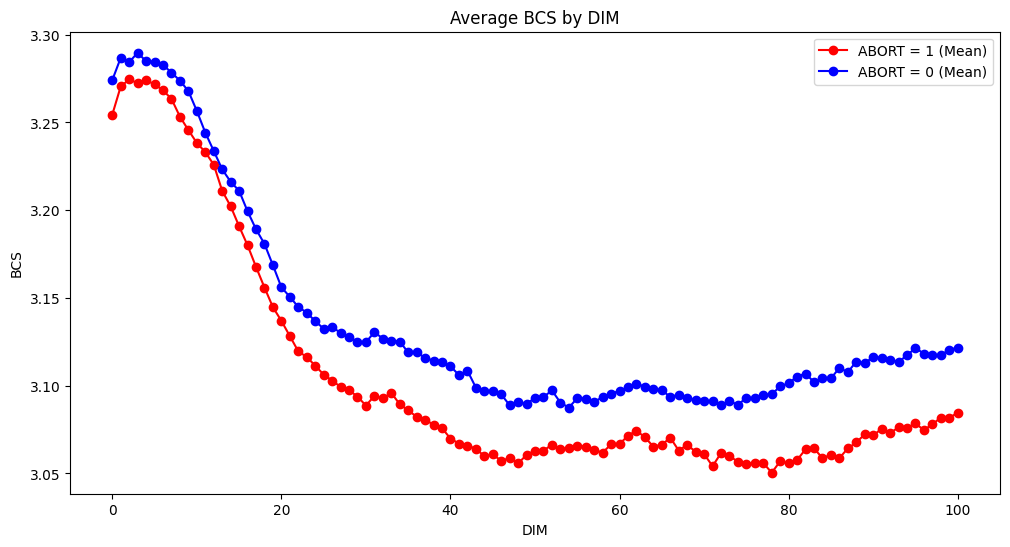

In [39]:
#plot mean bcs every dim by abort column
plt.figure(figsize=(12, 6))

abort_df = []
success_df = []

for _, row in data.iterrows():
    if row['ABORT'] == 1:
        abort_df.append(row.values[-101:])
    else:
        success_df.append(row.values[-101:])

abort_means = np.mean(abort_df, axis=0)
sucess_means = np.mean(success_df, axis=0)

plt.plot(data.columns[-101:], abort_means, marker='o', color='red')
plt.plot(data.columns[-101:], sucess_means, marker='o', color='blue')

plt.xlabel('DIM')
plt.ylabel('BCS')
plt.title('Average BCS by DIM')
plt.legend(['ABORT = 1 (Mean)', 'ABORT = 0 (Mean)'])
plt.show()

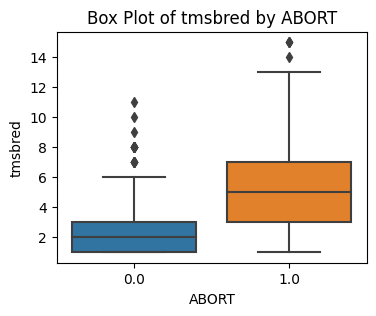

In [25]:
plt.figure(figsize=(4, 3))
sns.boxplot(x='ABORT', y='tmsbred', data=data)
plt.title('Box Plot of tmsbred by ABORT')
plt.xlabel('ABORT')
plt.ylabel('tmsbred')
plt.show()

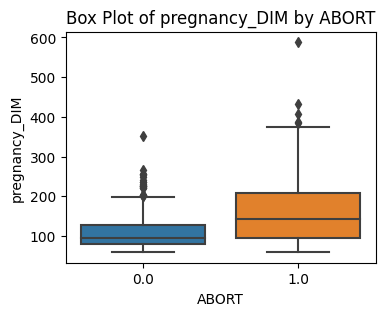

In [26]:
plt.figure(figsize=(4, 3))
sns.boxplot(x='ABORT', y='pregnancy_DIM', data=data)
plt.title('Box Plot of pregnancy_DIM by ABORT')
plt.xlabel('ABORT')
plt.ylabel('pregnancy_DIM')
plt.show()

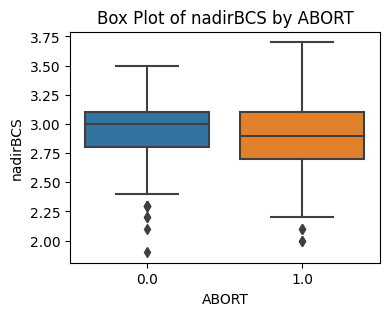

In [27]:
plt.figure(figsize=(4, 3))
sns.boxplot(x='ABORT', y='nadirBCS', data=data)
plt.title('Box Plot of nadirBCS by ABORT')
plt.xlabel('ABORT')
plt.ylabel('nadirBCS')
plt.show()

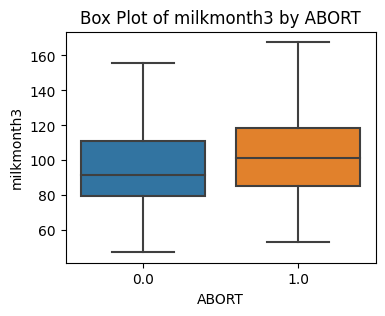

In [28]:
plt.figure(figsize=(4, 3))
sns.boxplot(x='ABORT', y='milkmonth3', data=data)
plt.title('Box Plot of milkmonth3 by ABORT')
plt.xlabel('ABORT')
plt.ylabel('milkmonth3')
plt.show()

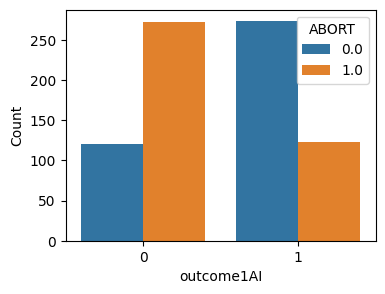

In [29]:
plt.figure(figsize=(4, 3))
sns.countplot(data=data, x='outcome1AI', hue='ABORT')
plt.xlabel('outcome1AI')
plt.ylabel('Count')
plt.legend(title='ABORT')
plt.show()

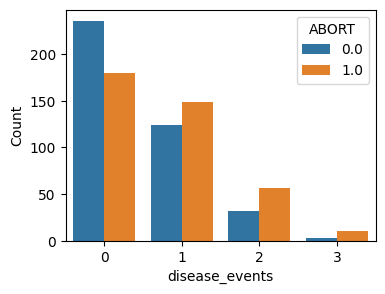

In [30]:
plt.figure(figsize=(4, 3))
sns.countplot(data=data, x='disease_events', hue='ABORT')
plt.xlabel('disease_events')
plt.ylabel('Count')
plt.legend(title='ABORT')
plt.show()

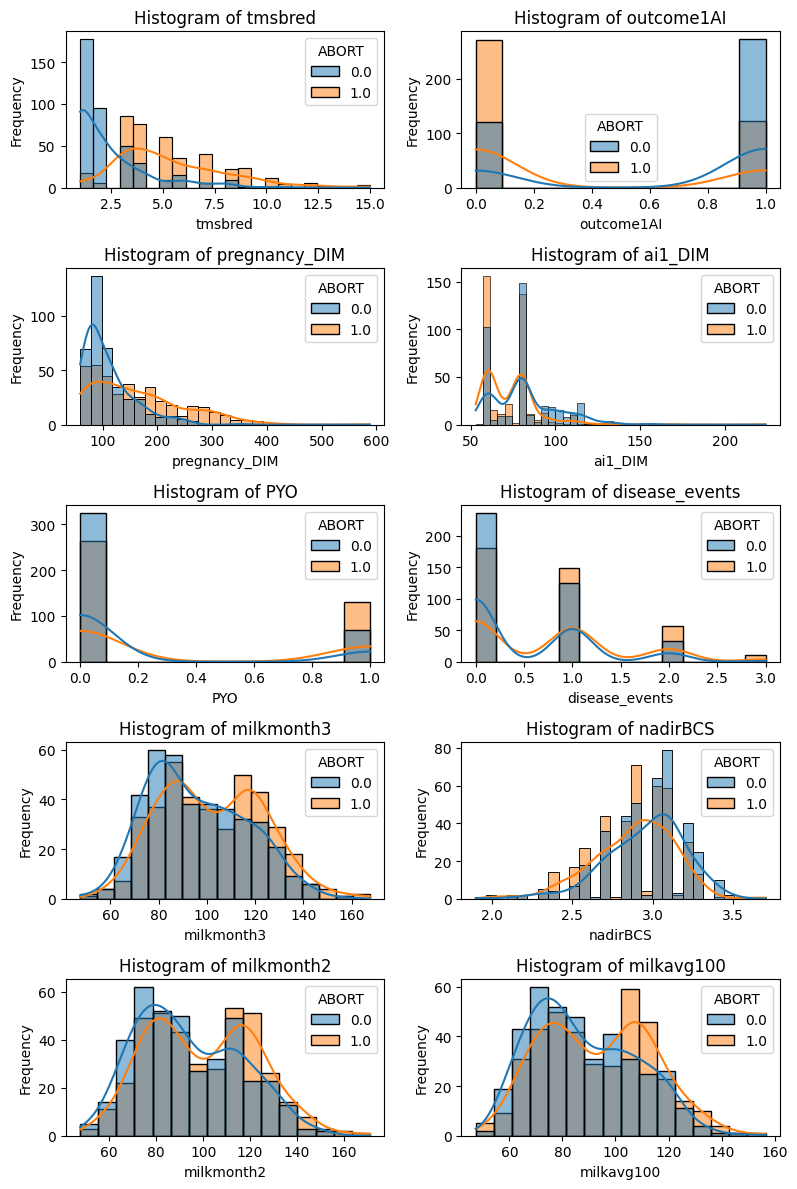

In [40]:
fig, axes = plt.subplots(5, 2, figsize=(8, 12))
axes = axes.flatten()

for ind, i in enumerate(ranked.head(10).index):
    ax = axes[ind]
    sns.histplot(x=i, hue='ABORT', data=data, kde=True, ax=ax)
    ax.set_title(f'Histogram of {i}')
    ax.set_xlabel(i)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [34]:
#PCA to see seperability
X = data.drop('ABORT', axis = 1)
y = data['ABORT']
X.columns = X.columns.astype(str)

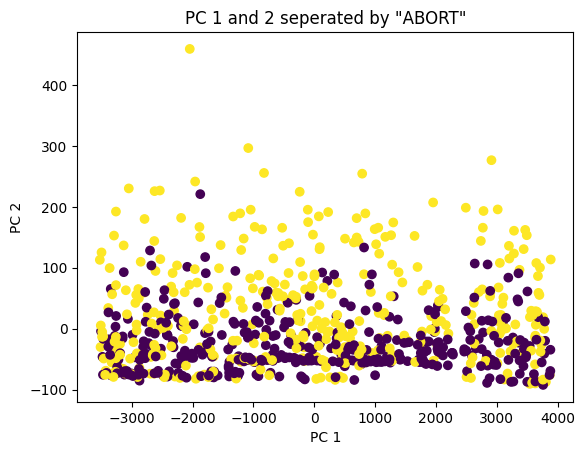

In [35]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('PC 1 and 2 seperated by "ABORT"')
plt.show()

In [32]:
#save downsampled data
#dataSave.to_csv('DOWNSAMPLEcleanDataApr22.csv', index=False) 

In [ ]:
#save extra data
#unused_data.to_csv('unusedDataApr22.csv', index =False)